In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.svm import SVC
sns.set_style(style="darkgrid")

In [9]:
X.shape

(50, 2)

In [14]:
y

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0])

In [48]:
X[:,0]

array([-4.80018592, -2.89515334, -0.52651865,  1.75568311, -2.84861451,
       -2.58053893,  0.36805993, -5.43452221,  1.85432263, -3.26398973,
       -3.17287671, -4.56357817, -3.99708282, -0.54833674, -0.8503994 ,
       -4.93573622,  0.57571674, -5.62041822, -5.00923634,  1.57798209,
       -5.16634796,  1.92857509,  1.12917878, -3.15679337, -3.98160803,
       -4.70222459, -3.01521373,  1.57923748,  1.52281456, -3.81782828,
        1.12207782,  0.86231331,  0.7272824 ,  1.94258518, -3.46108003,
       -0.54908978,  1.9968582 , -1.63666093, -4.15279915,  2.89567316,
        1.56247156, -2.78550643, -3.96935259,  1.73751204,  0.55315818,
       -5.75198245,  0.67425085, -0.31396198, -2.9533818 ,  0.44892334])

<AxesSubplot:>

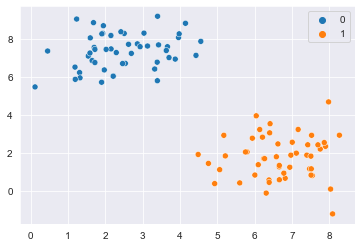

In [124]:
X,y=datasets.make_blobs(n_samples=100,centers=2,n_features=2)

sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [161]:
svc=SVC(kernel="linear")
svc.fit(X,y)

SVC(kernel='linear')

In [162]:
w1,w2=svc.coef_[0]

In [163]:
b=svc.intercept_[0]

In [114]:
# f(X)=w1*x1+w2*x2+b


In [115]:
# X[0][0]*w1+X[0][1]*w2+b

2.72527034569722

In [116]:
# X[5][0]*w1+X[5][1]*w2+b

-2.767213503693751

In [92]:
# X[:,0]*w1+X[:,1]*w2+b

array([ 1.43229391, -1.79078595,  1.65540672, -1.65433512,  1.76516107,
       -1.4113619 ,  1.4723642 , -2.04764342,  1.51952668,  2.22195998,
        1.64387157, -1.84938085,  1.90453425, -2.45751227, -2.02209521,
       -1.89021308, -2.28544145,  1.73980283,  1.56473912, -1.81716741,
       -2.17170166, -1.71659644, -1.77258553, -1.9278682 , -1.17993461,
       -1.35071645,  1.46237237, -2.19927783,  1.62599617, -2.08196482,
       -1.08911381,  1.81617861,  1.00054266,  1.19306168, -1.19026815,
       -1.78443695,  1.00028402,  1.69446227,  1.61151948, -1.0005679 ,
        1.3604317 ,  1.0833937 ,  1.73547027,  1.83711403, -1.29307107,
        2.86670688, -1.3686007 , -2.06087557, -2.46597038, -1.40722391,
        1.00028402, -1.70242133, -1.73944576,  2.29281379,  2.2888186 ,
       -1.77255388, -1.45688448, -1.42709431,  1.39238347,  2.04081831,
        1.52193853, -1.26720147,  1.29070145,  1.80729526, -1.38559304,
       -1.75732161, -2.20072178,  1.17025488, -2.23529246,  2.00

In [164]:
# w1*x1+w2*x2+b=0
# w1*x+w2*y+b=0
# y=-(b/w2)-(w1/w2)*x

w_=-w1/w2
b_=-b/w2


In [165]:
support_vectors_= svc.support_vectors_
support_vectors_

array([[3.39019295, 5.78316176],
       [5.17068831, 2.91404859],
       [6.03853696, 3.93926846]])

In [166]:
support_vectors_[:,0]

array([3.39019295, 5.17068831, 6.03853696])

In [157]:
# w1*x+w2*y+b=1
# w1*x+w2*y+b=-1
# y1=(1/w2)-(w1/w2)*x-(b/w2)
# y2=(-1/w2)-(w1/w2)*x-(b/w2)

In [167]:
w1_=-w1/w2
w2_=-w1/w2
b1_=-(b/w2)+(1/w2)
b2_=-(b/w2)+(-1/w2)

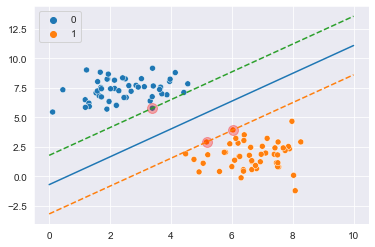

In [175]:
x=np.linspace(0,10,100)

sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)
# plt.axis([0,10,-1,10])
sns.lineplot(x=x,y=x*w_+b_,palette=sns.color_palette("hls",3)[0])
sns.lineplot(x=x,y=x*w1_+b1_,palette=sns.color_palette("hls",3)[1],ls="--")
sns.lineplot(x=x,y=x*w2_+b2_,palette=sns.color_palette("hls",3)[2],ls="--")

plt.scatter(support_vectors_[:,0],support_vectors_[:,1],color='red',s=100,alpha=0.3)